In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize,
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import gridspec
from matplotlib import patches as mpatches

import glob
import numpy as np
import os
import scipy

%load_ext autoreload
%autoreload 2
import sys

sys.path.insert(1, '../code')
import plotter
import utils
from utils import *
import plotter

%matplotlib inline
#sys.path.insert(1, '../../clust')
#import clustering_statistics as cs

In [2]:
statistics = ['wp', 'xi', 'xi2', 'upf', 'mcf']
stat_strs_single = np.loadtxt('../tables/statistic_sets_single.txt', dtype=str)
stat_strs_addin = np.loadtxt('../tables/statistic_sets_addin.txt', dtype=str)
stat_strs_addin_full = np.concatenate((['wp'], stat_strs_addin))
stat_strs_scale = np.concatenate((stat_strs_single, 
                                 ['xi_xi2', 'wp_xi_xi2', 'wp_xi_xi2_mcf', 'wp_xi_xi2_upf_mcf']))

params_keydeliverable = ['Omega_m', 'sigma_8', 'f', 'fsigma8']
params_keycosmo = ['Omega_m', 'sigma_8', 'f']
params_keyhodab = ['M_sat', 'v_bs', 'f_env']
params_keymix = ['Omega_m', 'sigma_8', 'f', 'M_sat', 'v_bs', 'f_env']

id_pairs_test = np.loadtxt('../tables/id_pairs_recovery_test_70.txt', delimiter=',', dtype=np.int)

labels_single = [
                 make_label('wp'),
                 make_label('xi'),
                 make_label('xi2'),
                 make_label('upf'),
                 make_label('mcf')
                ]
labels_addin = [
                 make_label('wp'),
                 '+'+make_label('xi'),
                 '+'+make_label('xi2'),
                 '+'+make_label('upf'),
                 '+'+make_label('mcf'),
                ]
labels_addin_full = [
                 make_label('wp'),
                 make_label(['wp', 'xi']),
                 make_label(['wp', 'xi', 'xi2']),
                 make_label(['wp', 'xi', 'xi2', 'upf']),
                 make_label(['wp', 'xi', 'xi2', 'upf', 'mcf'])
                ]
labels_scale = np.concatenate((labels_single, 
                               [make_label(['xi', 'xi2']),
                                make_label(['wp', 'xi', 'xi2']),
                                make_label(['wp', 'xi', 'xi2', 'mcf']),
                                make_label(['wp', 'xi', 'xi2', 'upf', 'mcf'])]))


colors_single = ['#73B9F3', '#2B66CE', '#31D8BF', '#FFB142', '#F97FF0']
colors_addin = ['#73B9F3', '#8973F5', '#952DAD', '#D81471', '#B70D0D']
colors_scale = np.concatenate((colors_single, 
                               ['navy', colors_addin[2], '#ff33b4', colors_addin[-1]]))
colors_cov = ['#7B767B', colors_addin[-1]]

## Plot stats

In [9]:
mock_name_train = 'aemulus_fmaxmocks_train'
mock_tag_train = '_aemulus_fmaxmocks_train'

#training_dir_base = f'/home/users/ksf293/clust/results{mock_tag_train}'
training_dir_base = f'/mount/sirocco1/ksf293/clust/results{mock_tag_train}'
id_pairs_train = np.loadtxt('../tables/id_pairs_train.txt', delimiter=',', dtype=int)
id_pairs_test = np.loadtxt('../tables/id_pairs_test.txt', delimiter=',', dtype=int)

In [10]:
mock_tag = '_unit'

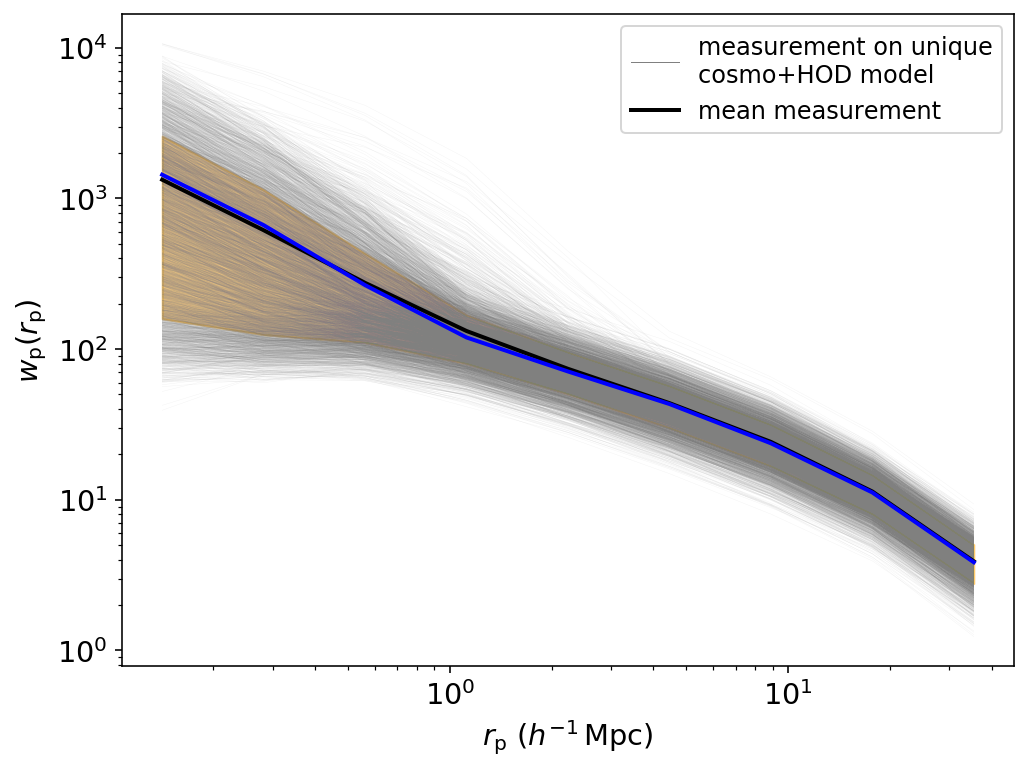

In [12]:
%matplotlib inline
statistic = 'wp'
#r_arr, y_train_arr = utils.load_statistics(statistic, training_dir_base, id_pairs_train)
r_arr, y_train_arr = utils.load_statistics(statistic, mock_name_train, id_pairs_train)
plotter.plot_statistics(statistic, r_arr, y_train_arr)

result_dir=f"/home/users/ksf293/clust/results{mock_tag}/results_{statistic}"
fn_stat=f"{result_dir}/{statistic}{mock_tag}.dat"
x_vals, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
plt.plot(x_vals, y_vals, lw=2, color='blue')

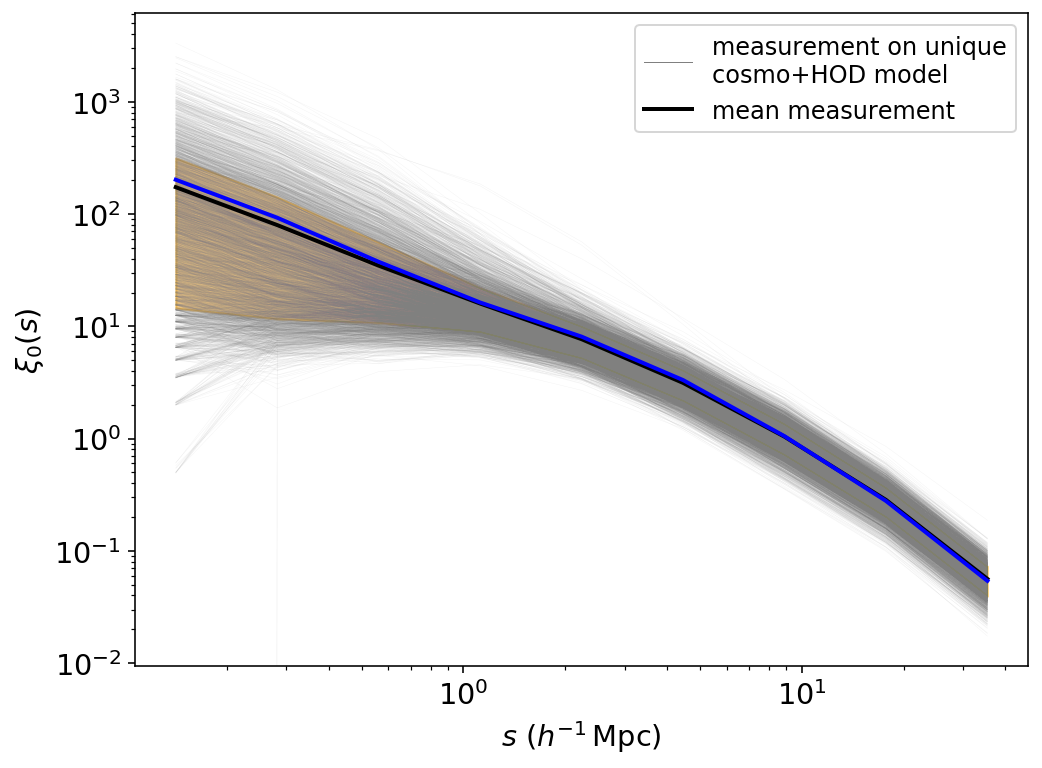

In [13]:
statistic = 'xi'
r_arr, y_train_arr = utils.load_statistics(statistic, mock_name_train, id_pairs_train)
plotter.plot_statistics(statistic, r_arr, y_train_arr)

result_dir=f"/home/users/ksf293/clust/results{mock_tag}/results_{statistic}"
fn_stat=f"{result_dir}/{statistic}{mock_tag}.dat"
x_vals, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
plt.plot(x_vals, y_vals, lw=2, color='blue')

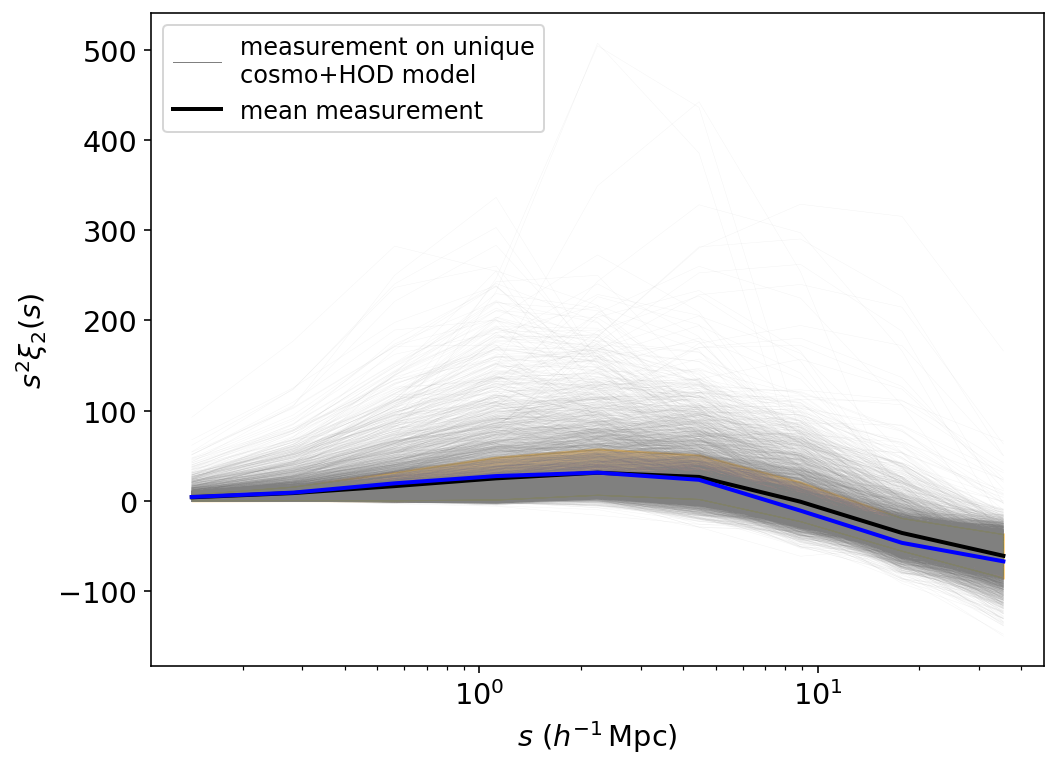

In [14]:
statistic = 'xi2'
r_arr, y_train_arr = utils.load_statistics(statistic, mock_name_train, id_pairs_train)
plotter.plot_statistics(statistic, r_arr, y_train_arr)

result_dir=f"/home/users/ksf293/clust/results{mock_tag}/results_{statistic}"
fn_stat=f"{result_dir}/{statistic}{mock_tag}.dat"
x_vals, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
plt.plot(x_vals, x_vals**2 * y_vals, lw=2, color='blue')

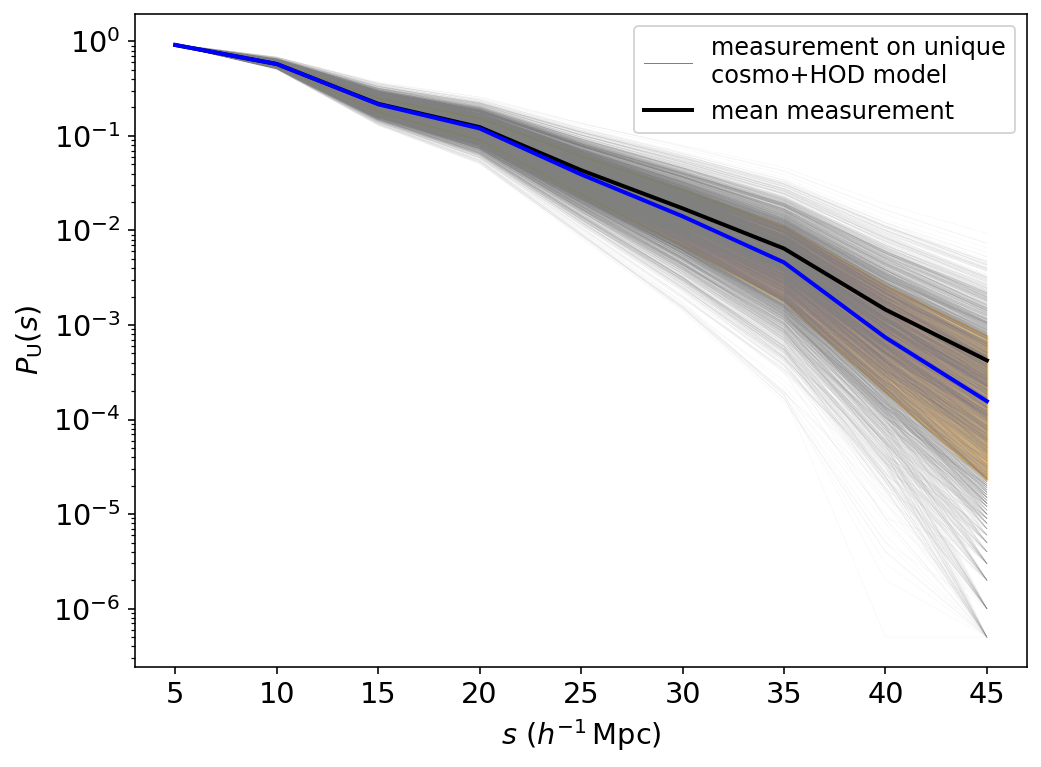

In [18]:
statistic = 'upf'
r_arr, y_train_arr = utils.load_statistics(statistic, mock_name_train, id_pairs_train)
plotter.plot_statistics(statistic, r_arr, y_train_arr)

result_dir=f"/home/users/ksf293/clust/results{mock_tag}/results_{statistic}"
fn_stat=f"{result_dir}/{statistic}{mock_tag}.dat"
x_vals, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
plt.plot(x_vals, y_vals, lw=2, color='blue')

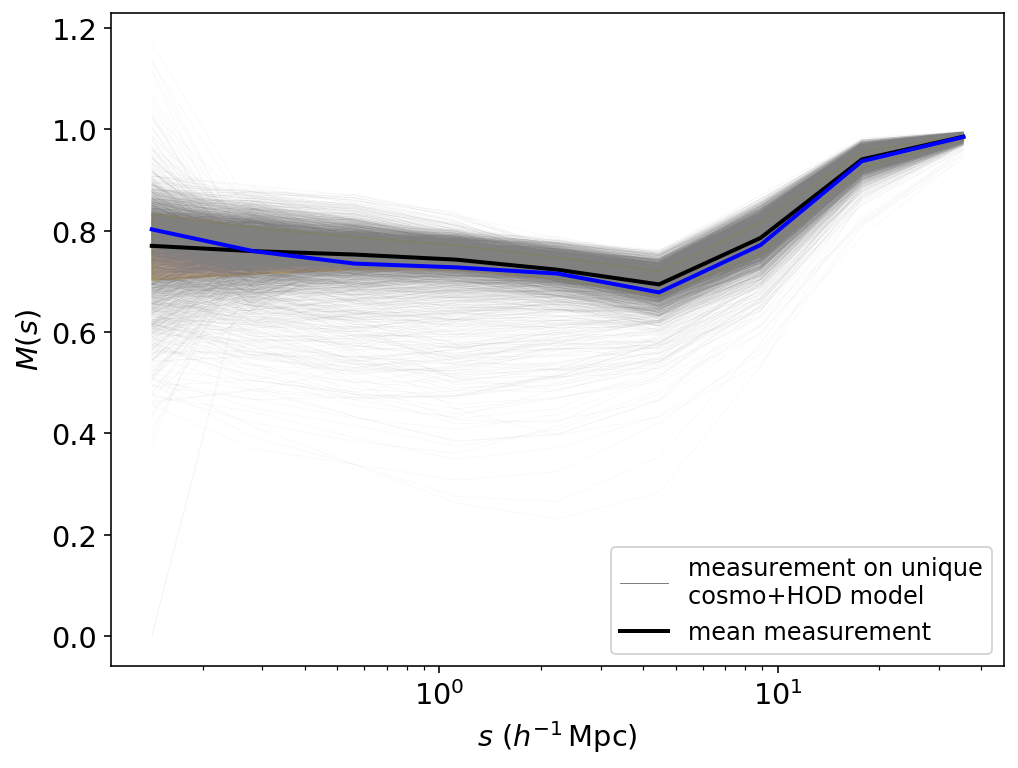

In [17]:
statistic = 'mcf'
r_arr, y_train_arr = utils.load_statistics(statistic, mock_name_train, id_pairs_train)
plotter.plot_statistics(statistic, r_arr, y_train_arr)

result_dir=f"/home/users/ksf293/clust/results{mock_tag}/results_{statistic}"
fn_stat=f"{result_dir}/{statistic}{mock_tag}.dat"
x_vals, y_vals = np.loadtxt(fn_stat, delimiter=',', unpack=True)
plt.plot(x_vals, y_vals, lw=2, color='blue')

# chains

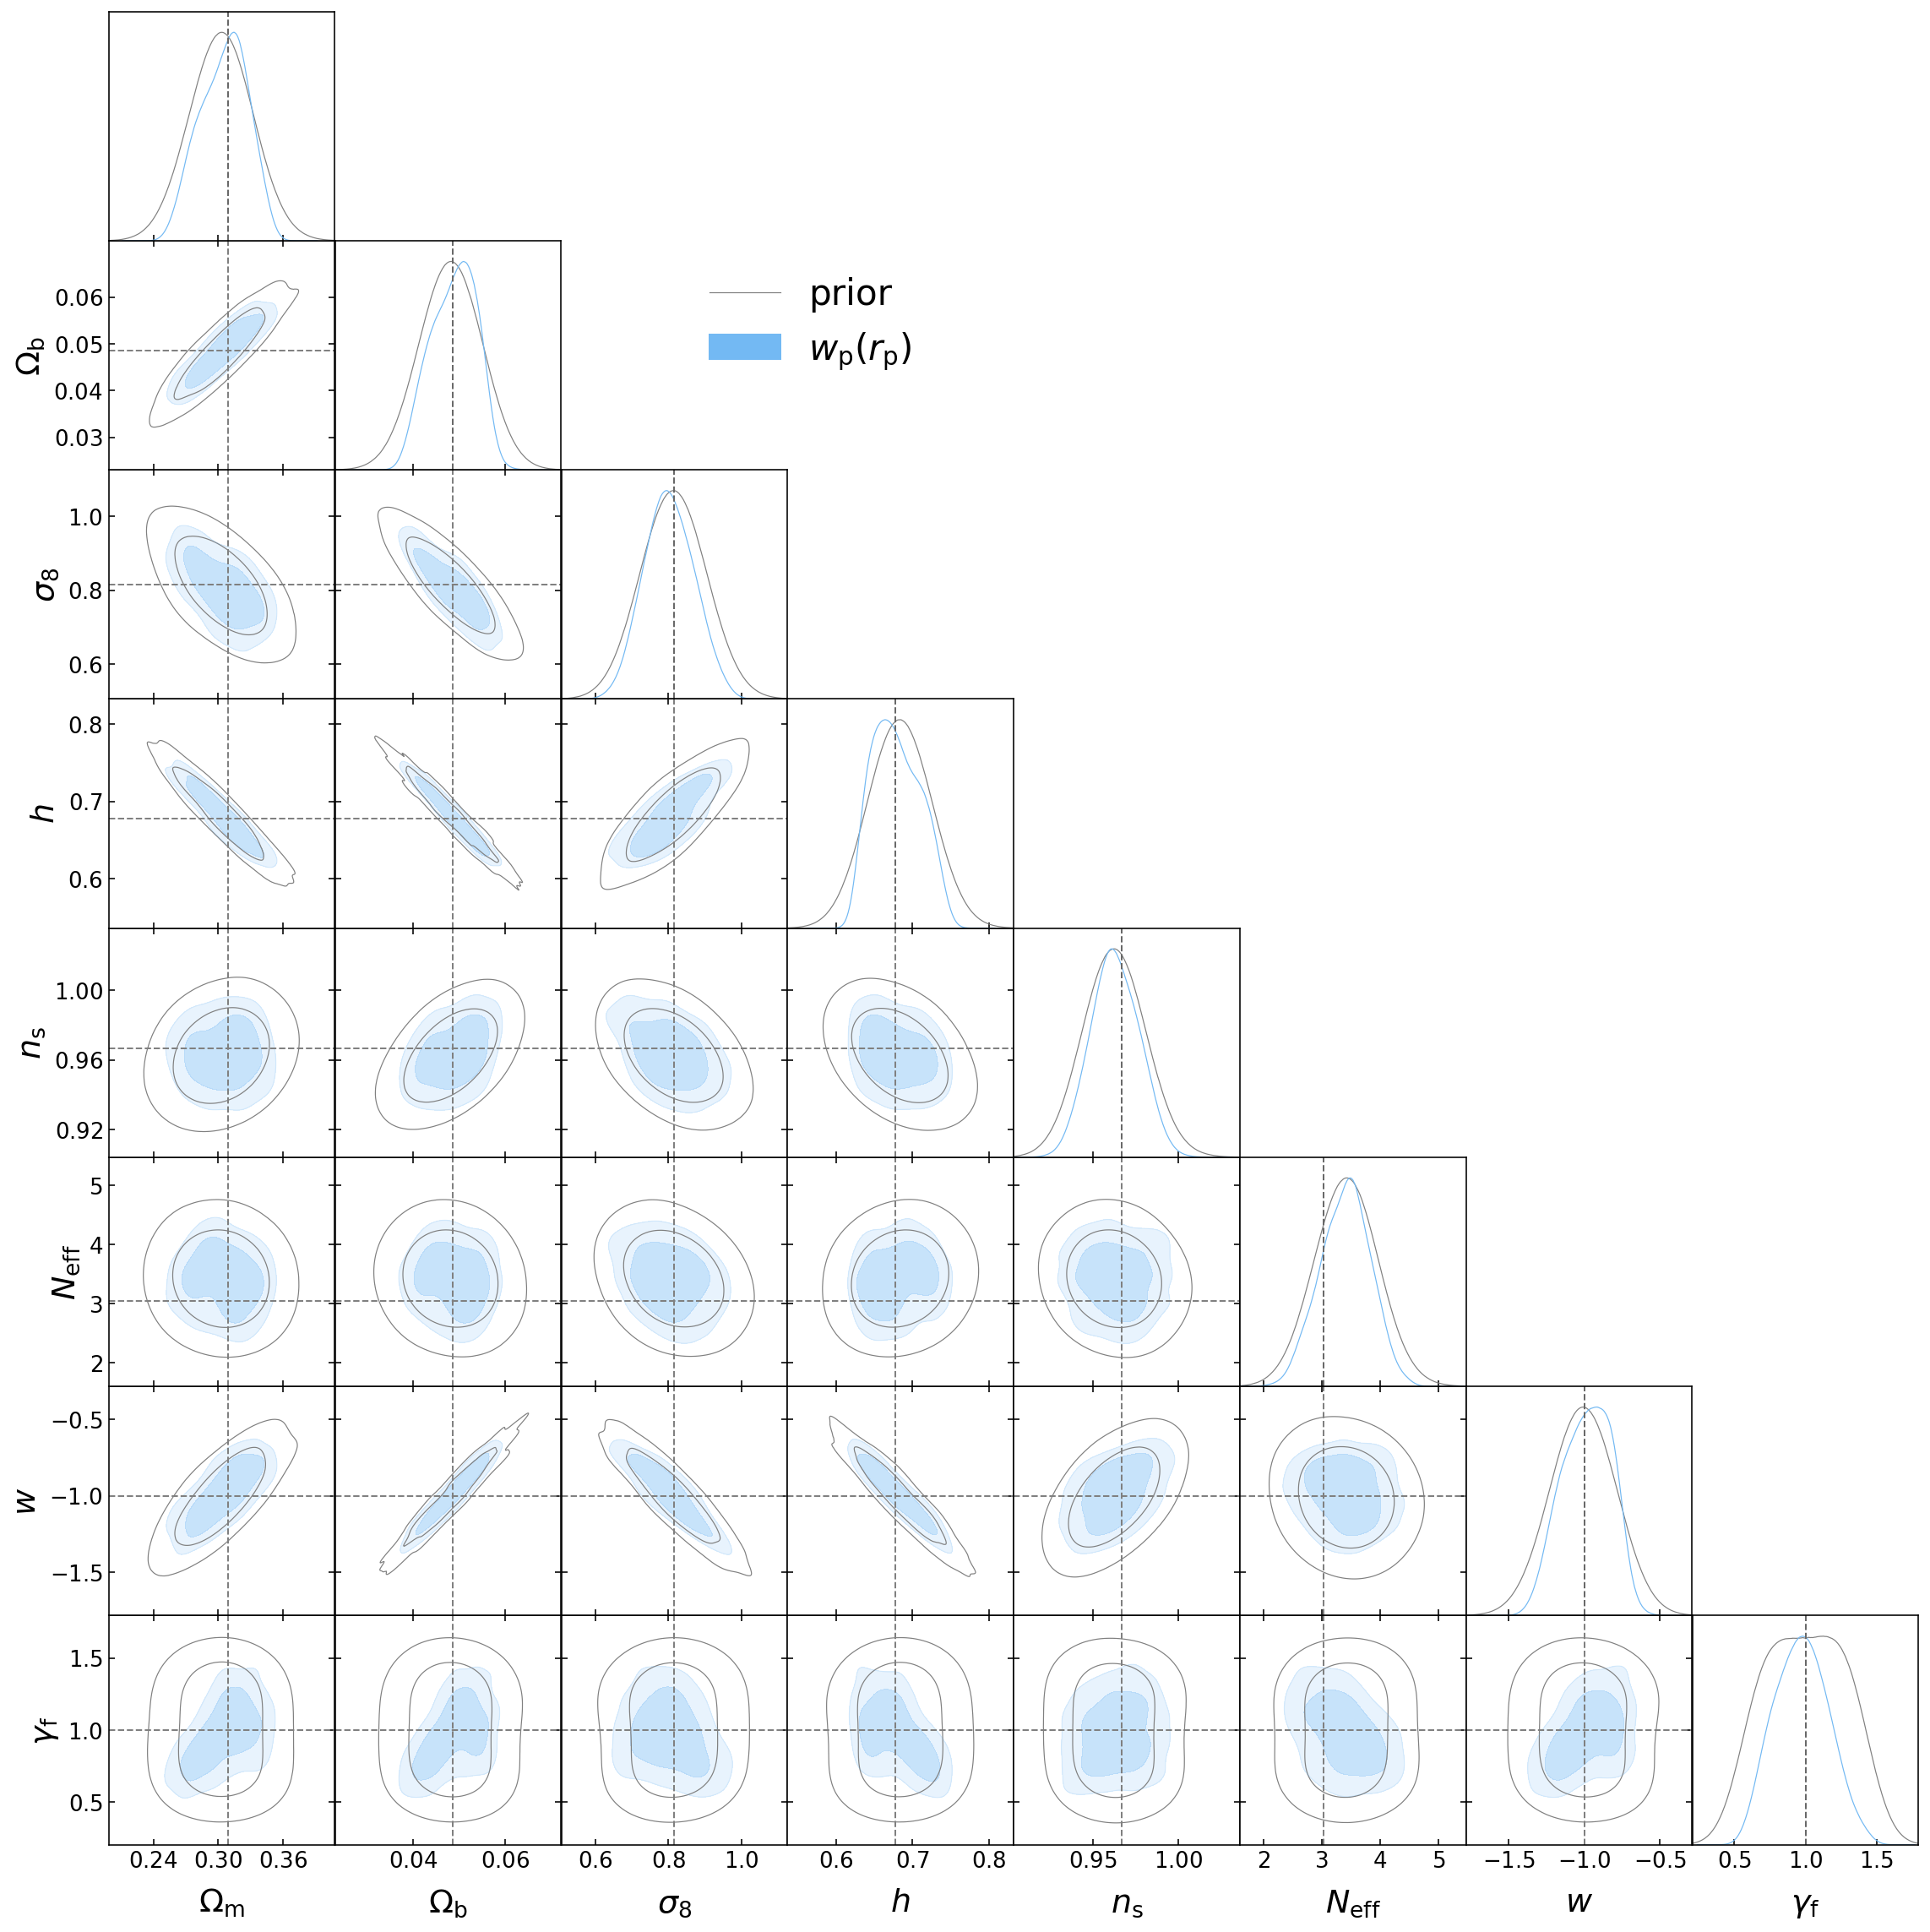

In [19]:
%matplotlib inline
chaintags = [
             'wp_unit_aemulus_fmaxmocks_smoothboth',
             'wp_xi_xi2_unit_aemulus_fmaxmocks_smoothboth',
             'wp_upf_mcf_unit_aemulus_fmaxmocks_smoothboth',
             'wp_xi_xi2_upf_mcf_unit_aemulus_fmaxmocks_smoothboth',
            ]
#colors = [colors_addin[2]]
#labels = [labels_addin_full[2]]
colors = [colors_addin[0], 
          colors_addin[2],
          'orange',
          colors_addin[4]]
labels = [labels_addin_full[0], 
          labels_addin_full[2], 
          'wp+upf+mcf
          labels_addin_full[4]
         ]
g = plotter.plot_contours(chaintags, colors=colors,
                          legend_labels=labels, legend_loc=(0.36, 0.8),
                          legend_fontsize=24,
                          params_toplot=cosmo_withf_param_names,
                          chaintag_prior='prior')